# what is an outlier?
- An outlier is a data print in a dataset that is distant from all other observations. A data porint that lies outside the overall distribution of the dataset.

## what are the criteria to identify an outlier?
1. Data points that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile
2. Datapoints that falls outside of 3 standard deviation. we can use a z score and is z score falls outside 2 standard deviation
## what is the reason for an outlier to exist in a dataset?
1. Variability in the data
2. An experimental measurement error
## What are the impacts of having outliers in a dataset?
1. it causes various problems during our stastical analysis
2. it may causes a significant impact on the mean and the standarnd deviation
## various way of finding the outliers
1. Using scatter plots
2. Box plot
3. using z score
4. using IQR interquartile range
5. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# our dataset
ds=[12, 15, 14, 13, 160, 16, 14, 15, 14, 13, 15,
 14, 16, 15, 14, 13, 15, 14, 16, 15,
 14, 13, 150]

(array([21.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([ 12. ,  26.8,  41.6,  56.4,  71.2,  86. , 100.8, 115.6, 130.4,
        145.2, 160. ]),
 <BarContainer object of 10 artists>)

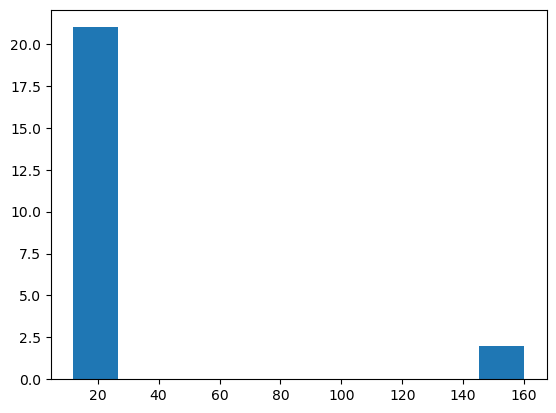

In [3]:
# we can see the outliers by histogram also..
plt.hist(ds)

In [4]:
# using for loop to extract the outliers
for x in ds:
    if x>140 and x<=160:
        print(f"outlier is {x}")
    else:
        pass

outlier is 160
outlier is 150


In [5]:
# Z-score
def detect_outliers(data):
    outliers = []
    threshold = 3   # 3 standard deviations
    mean = np.mean(data)
    std = np.std(data)

    for i in data:
        z_score = (i - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)

    return outliers

detect_outliers(ds)

[160, 150]

## IQR(Inter Quartile Range)
1. Sort the data
2. calculate Q1(25%) and Q3(75%)
3. IQR(Q3-Q1)
4. find the lower fence(Q1-1.5(IQR))
5. find the upper fence(Q3+1.5(IQR))

In [6]:
# sorting the dataset
ds=sorted(ds)
print(ds)

[12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 150, 160]


In [7]:
q1,q3=np.percentile(ds,[25,75])
print(q1,q3)

14.0 15.0


In [8]:
iqr=q3-q1
print(iqr)

1.0


In [9]:
# find lower fence and upper fence
lower_fence=(q1-1.5*iqr)
upper_fence=(q3+1.5*iqr)
print(lower_fence,upper_fence)

12.5 16.5


In [10]:
# using for loop to find the outliers
for i in ds:
    if i <= lower_fence or i >= upper_fence:
        print(f"the outlier is {i}")
    else:
        pass

the outlier is 12
the outlier is 150
the outlier is 160


<Axes: >

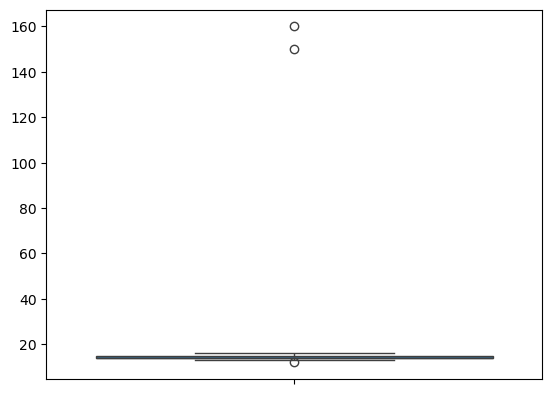

In [11]:
import seaborn as sns

sns.boxplot(ds)

# workin with new data set

In [12]:
dataset = [
    48, 52, 51, 49, 50, 53, 54, 52, 51, 50,
    49, 48, 52, 53, 51, 50, 49, 54, 55, 52,
    51, 50, 49, 53, 54, 52, 51, 50, 49, 53,
    120, 5, 130
]


# decteting the outlier using the Z score
## using z score
- Formula for z score = (Observation - mena) / standard deviation
- z = (X - u) / STD DIV

In [25]:
def detect_outliers(data):
    outliers=[]
    threshold=3
    
    mean=np.mean(data)
    std=np.std(data)

    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [26]:
outliers_pt=detect_outliers(dataset)

In [27]:
outliers_pt

[120, 130]

## IQR
- q3-q1
## steps
1. arrange the data in increasing order
2. calcualte q1 and q3
3. fild IQR
4. find lower bound q1-1.5*IQR
5. find upper bound q3+1.5*IQR
- any thind out side the upper and lower bound is an outlier

In [76]:
data = [
    5, 48, 48, 49, 49, 49, 49, 49, 50, 50, 50, 50, 50,
    51, 51, 51, 51, 51, 52, 52, 52, 52, 52,
    53, 53, 53, 53, 54, 54, 54, 55, 120, 130
]

# Step 1: Calculate quartiles
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)

# Step 2: Calculate IQR
iqr = q3 - q1

# Step 3: Calculate bounds
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Step 4: Detect outliers
outliers = []
for value in data:
    if value < lower or value > upper:
        outliers.append(value)

# Output results
print("Q1:", q1)
print("Q3:", q3)
print("IQR:", iqr)
print("Lower Bound:", lower)
print("Upper Bound:", upper)
print("Outliers:", outliers)


Q1: 50.0
Q3: 53.0
IQR: 3.0
Lower Bound: 45.5
Upper Bound: 57.5
Outliers: [5, 120, 130]
